In [1]:
import time
start = time.time()

from tqdm import tqdm
import albumentations as A
import cv2
import numpy as np
from matplotlib import pyplot as plt


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.19 (you have 0.0.19). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


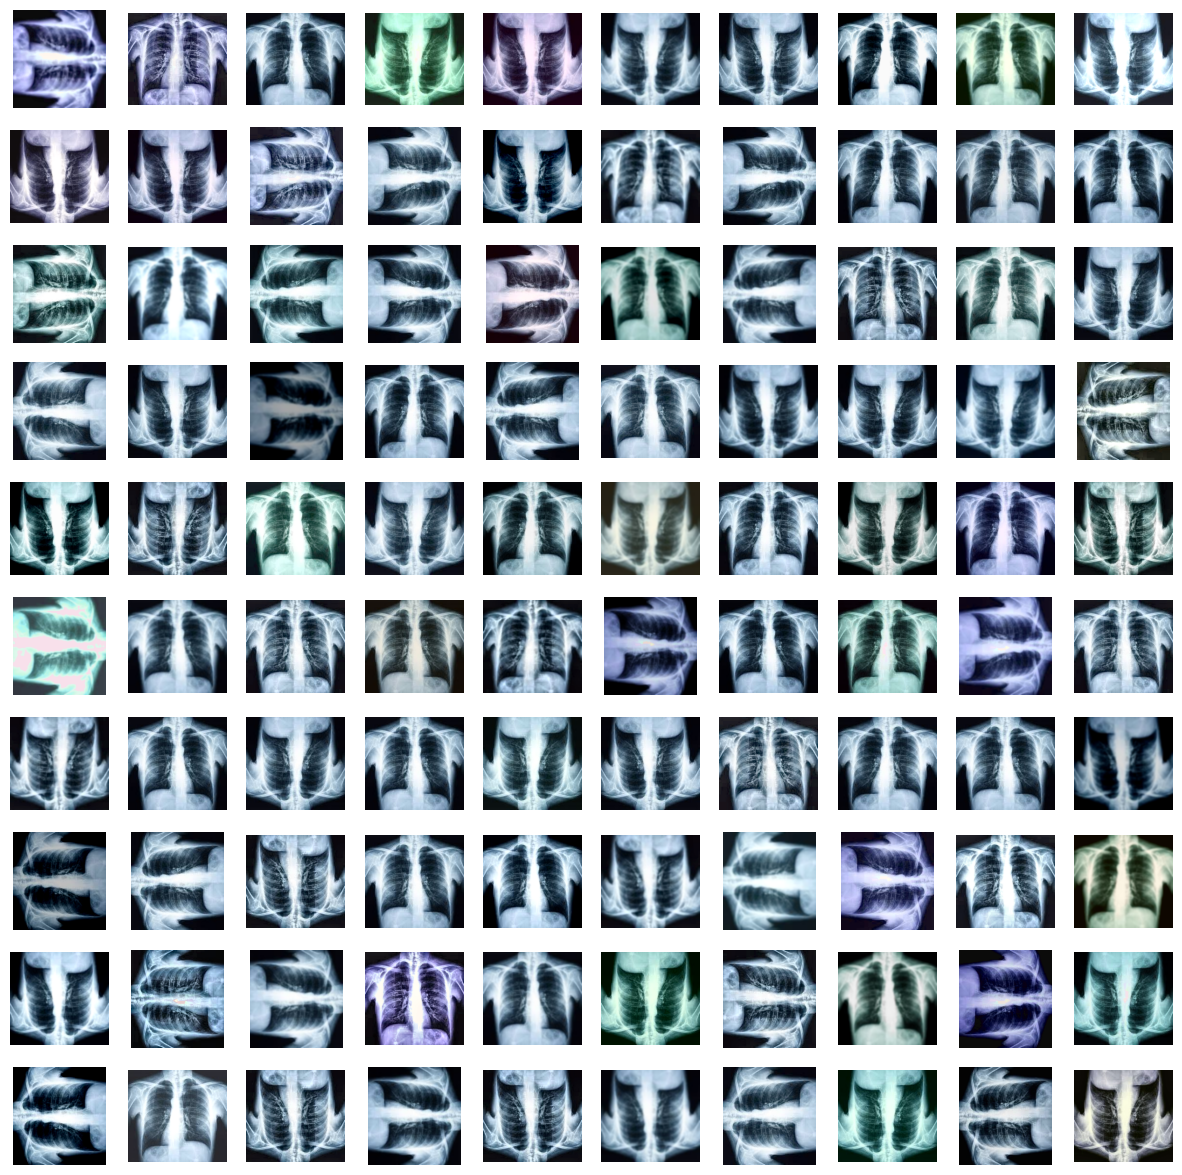

In [2]:
image_path = 'chest.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.3),
    A.HueSaturationValue(p=0.3),
    A.RGBShift(p=0.2),
    A.CLAHE(p=0.3),
    A.RandomGamma(p=0.3)
])

# Apply transformations and visualize
def visualize(image, augmented_images):
    fig, ax = plt.subplots(10, 10, figsize=(15, 15))
    for i in range(10):
        for j in range(10):
            ax[i, j].imshow(augmented_images[i*10 + j])
            ax[i, j].axis('off')
    plt.show()

# Create 100 variations of the image
augmented_images = []
for _ in range(100):
    augmented = transform(image=image)['image']
    augmented_images.append(augmented)

# Visualize the images
visualize(image, augmented_images)

In [3]:
end = time.time()

print(end - start)

3.882129669189453
